

*   Nama    : Dyah Ayu Amborowati
*   Dataset : Netflix Movies and TV Shows



# Import library

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load dataset

In [24]:
df = pd.read_csv("netflix_titles.csv")

# 1. Pre-processing Data

In [25]:
# Menampilkan 5 data teratas
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [26]:
# Mengecek nilai yang hilang
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


## Pembersihan  Data (Data Cleaning)

In [27]:
#  Mengisi nilai kosong untuk menghindari error
df.fillna("", inplace=True)

In [28]:
# Memeriksa kolom dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# 2. Exploratory Data Analysis (EDA)

<ipython-input-56-3ea5a02ac3e8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="type", palette=custom_palette)


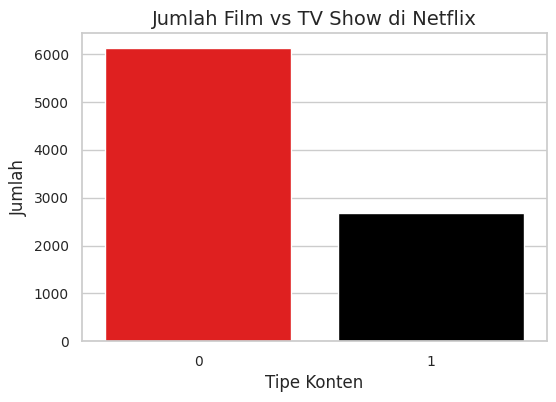

In [56]:
# 1. Visualisasi jenis konten (Film vs TV Show)
sns.set_theme(style="whitegrid")
custom_palette = sns.color_palette(["#FF0000", "#000000"])  # Merah dan Hitam

# Visualisasi jenis konten (Film vs TV Show)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="type", palette=custom_palette)
plt.title("Jumlah Film vs TV Show di Netflix", fontsize=14)
plt.ylabel("Jumlah", fontsize=12)
plt.xlabel("Tipe Konten", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

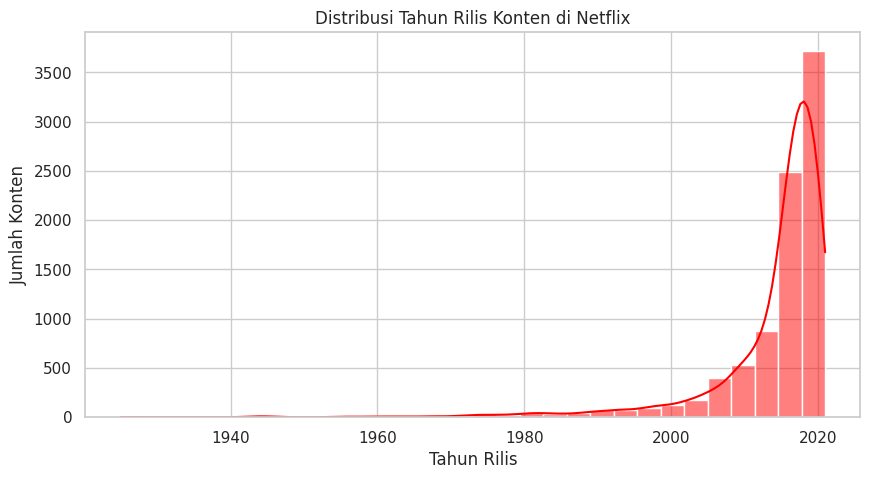

In [59]:
# 2. Distribusi tahun rilis
plt.figure(figsize=(10, 5))
sns.histplot(df["release_year"], bins=30, kde=True, color="red")
plt.title("Distribusi Tahun Rilis Konten di Netflix")
plt.xlabel("Tahun Rilis")
plt.ylabel("Jumlah Konten")
plt.show()

<ipython-input-62-08d1ff92cea1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette=custom_palette)
<ipython-input-62-08d1ff92cea1>:9: UserWarning: 
The palette list has fewer values (2) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=top_countries.values, y=top_countries.index, palette=custom_palette)


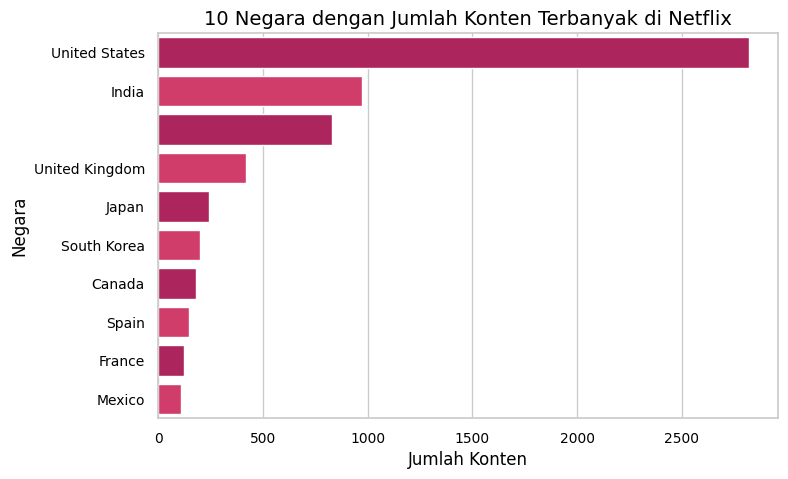

In [62]:
# 3. Jumlah konten berdasarkan negara teratas
sns.set_theme(style="whitegrid")
custom_palette = sns.color_palette(["#C30E59", "#E82561"])

# Jumlah konten berdasarkan negara teratas
top_countries = df["country"].value_counts().head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette=custom_palette)
plt.title("10 Negara dengan Jumlah Konten Terbanyak di Netflix", fontsize=14, color="black")
plt.xlabel("Jumlah Konten", fontsize=12, color="black")
plt.ylabel("Negara", fontsize=12, color="black")
plt.xticks(fontsize=10, color="black")
plt.yticks(fontsize=10, color="black")
plt.show()

In [48]:
# 4. Perbandingan durasi Film vs TV Show (kolom duration)
# Hanya gunakan data dengan kolom 'duration' yang valid
df_filtered = df[df["duration"] != ""]
df_filtered["duration"] = df_filtered["duration"].str.replace(" min", "").str.replace(" Season", "").str.replace("s", "")
df_filtered["duration"] = pd.to_numeric(df_filtered["duration"], errors="coerce")

<ipython-input-48-62545305134d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["duration"] = df_filtered["duration"].str.replace(" min", "").str.replace(" Season", "").str.replace("s", "")
<ipython-input-48-62545305134d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["duration"] = pd.to_numeric(df_filtered["duration"], errors="coerce")


<ipython-input-63-211f411821d5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x="type", y="duration", palette="hot")


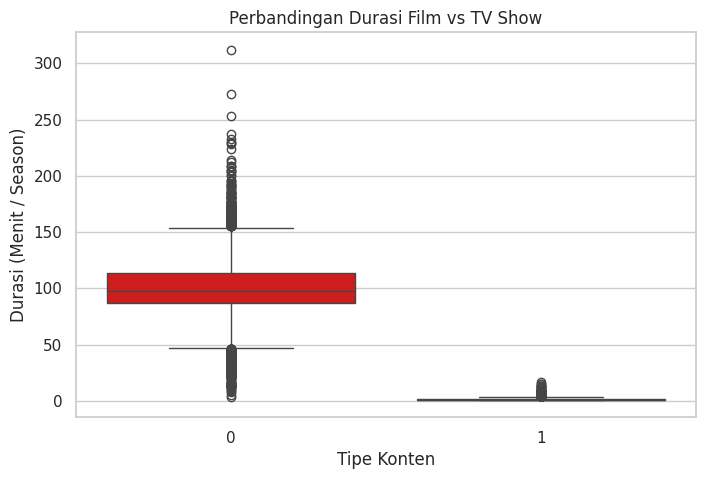

In [63]:
# Boxplot durasi
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_filtered, x="type", y="duration", palette="hot")
plt.title("Perbandingan Durasi Film vs TV Show")
plt.xlabel("Tipe Konten")
plt.ylabel("Durasi (Menit / Season)")
plt.show()

In [51]:
# 6. Korelasi antar fitur dalam dataset
# Encode kategori untuk korelasi
df_encoded = df.copy()
df_encoded["type"] = df_encoded["type"].astype("category").cat.codes
df_encoded["listed_in"] = LabelEncoder().fit_transform(df_encoded["listed_in"])

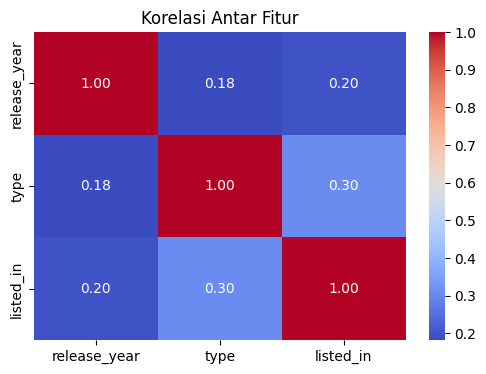

In [52]:
# Korelasi
correlation_matrix = df_encoded[["release_year", "type", "listed_in"]].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Fitur")
plt.show()

# 3. Preprocessing untuk Machine Learning
## Prediksi tipe ('Movie' atau 'TV Show') berdasarkan genre dan lainnya

In [64]:
# Menggunakan kolom 'listed_in' (kategori)
df["type"] = LabelEncoder().fit_transform(df["type"])
df["listed_in"] = LabelEncoder().fit_transform(df["listed_in"])

In [65]:
# Pilih fitur dan label
X = df[["release_year", "listed_in"]]  # Fitur
y = df["type"]  # Label

In [66]:
# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Model Machine Learning

## Model Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [70]:
# Prediksi dan Evaluasi Logistic Regression
y_pred_logistic = logistic_model.predict(X_test)
print("\n[Logistic Regression]")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))


[Logistic Regression]
Accuracy: 0.7315550510783201
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.93      0.83      1214
           1       0.66      0.29      0.40       548

    accuracy                           0.73      1762
   macro avg       0.70      0.61      0.61      1762
weighted avg       0.72      0.73      0.69      1762



## Model Support Vector Machine (SVM)

In [36]:
from sklearn.svm import SVC

svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [37]:
# Prediksi dan Evaluasi SVM
y_pred_svm = svm_model.predict(X_test)
print("\n[Support Vector Machine (SVM)]")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


[Support Vector Machine (SVM)]
Accuracy: 0.6889897843359818
Classification Report:
               precision    recall  f1-score   support

           0       0.69      1.00      0.82      1214
           1       0.00      0.00      0.00       548

    accuracy                           0.69      1762
   macro avg       0.34      0.50      0.41      1762
weighted avg       0.47      0.69      0.56      1762



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model Random Forest Classifier (Sebagai Perbandingan)

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
# Prediksi dan Evaluasi Random Forest
y_pred_rf = rf_model.predict(X_test)
print("\n[Random Forest]")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


[Random Forest]
Accuracy: 0.9971623155505108
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1214
           1       0.99      1.00      1.00       548

    accuracy                           1.00      1762
   macro avg       1.00      1.00      1.00      1762
weighted avg       1.00      1.00      1.00      1762



# 5. Visualisasi Akurasi Model

In [40]:
models = ["Logistic Regression", "SVM", "Random Forest"]
accuracies = [
    accuracy_score(y_test, y_pred_logistic),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_rf),
]

<ipython-input-41-03540cc165ee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="cool")


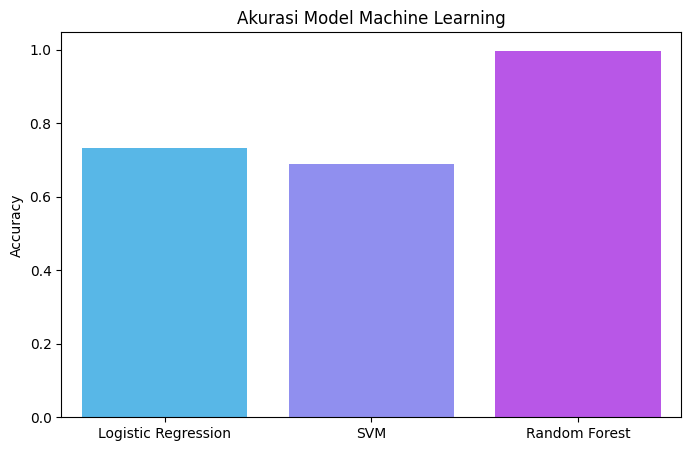

In [41]:
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette="cool")
plt.title("Akurasi Model Machine Learning")
plt.ylabel("Accuracy")
plt.show()